# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [111]:
#ваш код
import pandas as pd
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [112]:
#ваш код
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [113]:
#ваш код 

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [114]:
#ваш код 
import numpy as np
X = np.array(data.drop(['sales'], axis = 1, inplace=False))
y = np.array(data['sales'])

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [115]:
# import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [116]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [117]:
# ваш код 
num_iters = 1000
m = X.shape[0] # количество строк в матрице X
n = X.shape[1] # количество столбцов в матрице X
w = np.zeros((n, 1))

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
cost = sum(((X @ w) - y) ** 2)/(len(y))

# выводим веса модели
w = w.T[0]
w

array([ 41.56217205, 110.13144155,  73.52860638,  -0.55006384])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [118]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [119]:
#ваш код
X = np.array(data.drop(['sales'], axis = 1, inplace=False))
mean = np.mean(X, axis = 0)
std_dev = np.std(X, axis = 0)
X = (X - mean)/std_dev
y = np.array(data['sales'])

**Добавим единичный столбец**

In [120]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [121]:
#ваш код
def mse_error(y, y_pred):
    """Функция получит среднеквадратичную ошибку
    
    Args:
        y - целевая переменная
        y_pred - предсказанные значения
    
    Returns:
        MSE
    """
    error = ((y - y_pred)**2)
    mse = np.sum(error)/len(y)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [122]:
#ваш код
y_pred = np.mean(y)
mse_error(y, y_pred)

27.085743750000002

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [123]:
#ваш код
def lin_pred(X, w):
    """Функция получит предсказания
    
    Args:
        X - матрица предикторов
        w - ветор весов линейной модели
    
    Returns:
        вектор прогнозов
    """    
    y_pred = X @ w
    return y_pred
# обновим веса
w_new = np.linalg.inv(X.T @ X) @ X.T @ y
mse = mse_error(y, lin_pred(X, w_new))
print('Среднеквадратичная ошибка прогноза продаж для отмасштабированных предикаторов Х:', np.round(mse,3))

Среднеквадратичная ошибка прогноза продаж для отмасштабированных предикаторов Х: 2.784


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [124]:
#ваш код
train_ind = np.random.randint(X.shape[0])
def stoch_grad_step(X, y, w, train_ind, eta):
    """Функция получит вектор обновелнных весов
    
    Args:
        X - матрица предикторов
        y - целевая переменная
        w - ветор весов линейной модели
        train_ind - индекс объекта обучающей выборки
        eta - шаг градиентного спуска
    Returns:
        вектор весов
    """     
    #посчитаем направление изменения
    grad = (X[train_ind]* 2 *((X[train_ind] @ w) - y[train_ind])/len(y))
    # возвращаем разницу между весами(коэффициентами регрессии)
    new_w = w - grad * eta
    return new_w 

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [125]:
#ваш код
def stochastic_gradient_descent(X, y, w, eta, max_iter, e_dis):
    """Функция получит вектор весов и вектор ошибок
    
    Args:
        X - матрица предикторов
        y - целевая переменная
        w - ветор весов линейной модели
        eta - шаг градиентного спуска
        max_iter - максимальное число итераций
        e_dis - евклидово расстояние, при котором алгоритм прекратит работу
    Returns:
        вектор весов
        вектор ошибок
    """     
    #расстояние между векторами весов на соседних итерациях 
    distance = np.inf
    #список для фиксации ошибок
    error = []
    #счетчик итераций
    count_iter = 0
    while distance > e_dis and count_iter < max_iter:
        #индекс объекта обучающей выборки
        train_ind = np.random.randint(X.shape[0])
        #запиcываем в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее.
        w = stoch_grad_step(X, y, w, train_ind, eta)
        #рассчитываем текущее расстояние между векторами весов
        distance = np.linalg.norm(w)
        #записываем текущую ошибку в вектор ошибок
        error.append(mse_error(y, np.dot(X,w)))
        #прибавляем к счетчику итерацию
        count_iter += 1
    return w, error


w = np.zeros(X.shape[1])
max_iter = 10**5
eta = 0.01
w_stoch, errors_stoch = stochastic_gradient_descent(X, y, w, eta, max_iter, 0.0001)

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

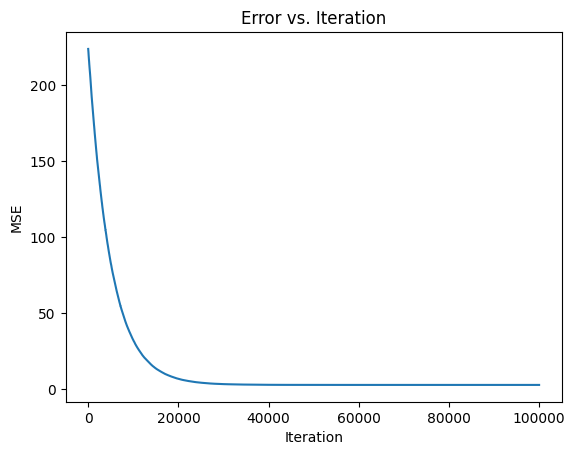

In [126]:
# ваш код
import matplotlib.pyplot as plt
plt.plot(range(max_iter), errors_stoch)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Error vs. Iteration')
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [127]:
# ваш код
print(f'Вектор весов, к которому сошелся метод:{w_stoch}')

Вектор весов, к которому сошелся метод:[14.02764956  3.92695005  2.78480957 -0.03577161]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [128]:
# ваш код
print(f'MSE на последний итерации:{errors_stoch[-1]}')

MSE на последний итерации:2.7844901045621744
